In [1]:
import sys, os
import yaml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xbout import open_boutdataset
sys.path.append(r'C:\Users\mikek\OneDrive\Project\python-packages')

from hypnotoad import tokamak
from hypnotoad.core.mesh import BoutMesh
from gridtools.gridue_to_bout import *
from gridtools.hypnotoad_tools import *

# import gridtools.solps_python_scripts.setup
# from solps_python_scripts.plot_solps       import plot_mesh, plot_wall_loads
# from solps_python_scripts import *



# import hypno_gridplot_mk

%load_ext autoreload
%autoreload 2

In [2]:
d = Dataset(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\b2-conversion\bout.grd.nc")

NXPE not found, setting to 1
NYPE not found, setting to 1
MXG not found, setting to 2
MYG not found, setting to 0
MXSUB not found, setting to 36
MYSUB not found, setting to 110


KeyError: 't_array'

In [2]:
%matplotlib qt

In [3]:
gridue = importGridue(r"C:\Users\mikek\OneDrive\Project\python-packages\gridtools\UEDGE_102x36")
plot(gridue)

(104, 38, 5)


C:\Users\mikek\OneDrive\Project\python-packages\gridtools\gridue_to_bout.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.concatenate((r[i][j][idx], z[i][j][idx])).reshape(2, 5).T,


<AxesSubplot: xlabel='R', ylabel='Z'>

# Plot grid cells

lower_inner_PFR
lower_inner_SOL
inner_core
inner_SOL
upper_inner_PFR
upper_inner_SOL
upper_outer_PFR
upper_outer_SOL
outer_core
outer_SOL
lower_outer_PFR
lower_outer_SOL


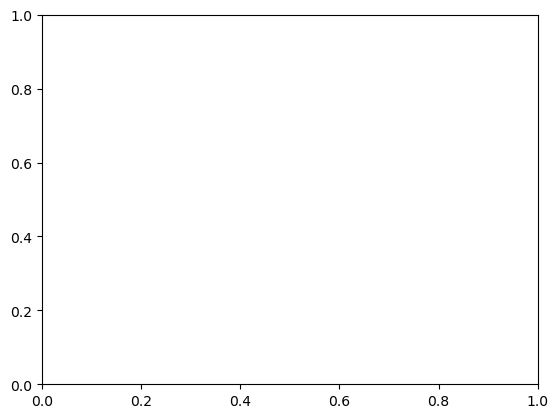

In [6]:
gridfile = "st40-a1.nc"
fig, ax = plt.subplots()


mxg = 2
branch_cuts = False
separatrix = True
targets = False
save_as = None
no_show = False

ds = open_boutdataset(
        gridfile,
        geometry="toroidal",
        keep_xboundaries=True,
        keep_yboundaries=True,
        info=False,
        drop_variables="theta",
    )

y_boundary_guards = ds.metadata.get("y_boundary_guards", 0)

if y_boundary_guards < 1:
    raise ValueError(
        "Grid file does not include y-boundary cells. These are required for grid "
        "plotting"
    )

for r in ds.regions:
    ds_region = ds.bout.from_region(r, with_guards={"x": 1, "theta": 1})
    print(r)

    if ds_region.regions[r].connection_inner_x is None:
        xin = mxg
        xin_pol = mxg
    else:
        xin = None
        xin_pol = 1

    if ds_region.regions[r].connection_outer_x is None:
        if mxg == 1:
            xout_corner_rad = None
            xout_corner_pol = xout_corner_rad
        else:
            xout_corner_rad = -mxg + 1
            xout_corner_pol = xout_corner_rad
        xout_centre = -mxg
    else:
        xout_corner_rad = None
        xout_corner_pol = -1
        xout_centre = None

    if ds_region.regions[r].connection_lower_y is None:
        ylow = y_boundary_guards
    else:
        ylow = None

    if ds_region.regions[r].connection_upper_y is None:
        if y_boundary_guards == 1:
            yup_corner = None
        else:
            yup_corner = -y_boundary_guards + 1
        yup_centre = -y_boundary_guards
    else:
        yup_corner = None
        yup_centre = None



In [11]:
type(xin)

NoneType

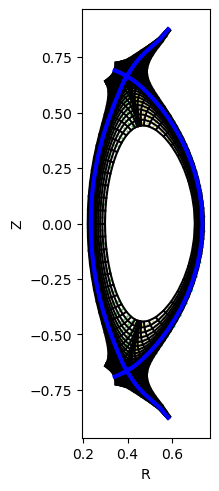

In [9]:
gridfile = "st40-a1.nc"

mxg = 2
branch_cuts = False
separatrix = True
targets = False
save_as = None
no_show = False

ds = open_boutdataset(
        gridfile,
        geometry="toroidal",
        keep_xboundaries=True,
        keep_yboundaries=True,
        info=False,
        drop_variables="theta",
    )

y_boundary_guards = ds.metadata.get("y_boundary_guards", 0)

if y_boundary_guards < 1:
    raise ValueError(
        "Grid file does not include y-boundary cells. These are required for grid "
        "plotting"
    )

plt.figure(constrained_layout=True)

for r in ds.regions:
    ds_region = ds.bout.from_region(r, with_guards={"x": 1, "theta": 1})

    if ds_region.regions[r].connection_inner_x is None:
        xin = mxg
        xin_pol = mxg
    else:
        xin = None
        xin_pol = 1

    if ds_region.regions[r].connection_outer_x is None:
        if mxg == 1:
            xout_corner_rad = None
            xout_corner_pol = xout_corner_rad
        else:
            xout_corner_rad = -mxg + 1
            xout_corner_pol = xout_corner_rad
        xout_centre = -mxg
    else:
        xout_corner_rad = None
        xout_corner_pol = -1
        xout_centre = None

    if ds_region.regions[r].connection_lower_y is None:
        ylow = y_boundary_guards
    else:
        ylow = None

    if ds_region.regions[r].connection_upper_y is None:
        if y_boundary_guards == 1:
            yup_corner = None
        else:
            yup_corner = -y_boundary_guards + 1
        yup_centre = -y_boundary_guards
    else:
        yup_corner = None
        yup_centre = None

    # plot grid points at cell centres
    # Note: have to use `s` to set marker size, because xarray has used a `size`
    # kwarg for something else.
    ds_region.isel(
        x=slice(xin, xout_centre), theta=slice(ylow, yup_centre)
    ).plot.scatter("R", "Z", marker=".",  s=1)

    # plot radial grid lines
    plt.plot(
        ds_region["Rxy_corners"].isel(
            x=slice(xin, xout_corner_rad), theta=slice(ylow, yup_corner)
        ),
        ds_region["Zxy_corners"].isel(
            x=slice(xin, xout_corner_rad), theta=slice(ylow, yup_corner)
        ),
        color="k",
    )

    # plot poloidal grid lines
    plt.plot(
        ds_region["Rxy_corners"]
        .isel(x=slice(xin_pol, xout_corner_pol), theta=slice(ylow, yup_corner))
        .T,
        ds_region["Zxy_corners"]
        .isel(x=slice(xin_pol, xout_corner_pol), theta=slice(ylow, yup_corner))
        .T,
        color="k",
    )

    connection_upper_y = ds_region.regions[r].connection_upper_y
    if (
        branch_cuts
        and connection_upper_y is not None
        and ds.regions[r].yupper_ind != ds.regions[connection_upper_y].ylower_ind
    ):
        # Highlight the branch cuts
        # By arbitrary choice, plot from the region(s) below the branch cut, so
        # highlight the upper edge.
        # Note, the condition above comparing r's yupper_ind and
        # connection_upper_y's ylower_ind checks that the region's aren't actually
        # neighbouring in the global grid, because if they are the boundary between
        # regions is not (or 'not really') a branch cut.
        plt.plot(
            ds_region["Rxy_corners"].isel(x=slice(xin, xout_corner_rad), theta=-1),
            ds_region["Zxy_corners"].isel(x=slice(xin, xout_corner_rad), theta=-1),
            color="r",
            linewidth=3,
            zorder=1000,
        )

    if separatrix and ds_region.regions[r].connection_outer_x is not None:
        # Highlight the branch cuts
        # By arbitrary choice, plot from the region(s) inside the separatrix, so
        # highlight the outer edge.
        plt.plot(
            ds_region["Rxy_corners"].isel(x=-1, theta=slice(ylow, yup_corner)),
            ds_region["Zxy_corners"].isel(x=-1, theta=slice(ylow, yup_corner)),
            color="b",
            linewidth=3,
            zorder=999,
        )

    if targets:
        if ds_region.regions[r].connection_lower_y is None:
            plt.plot(
                ds_region["Rxy_corners"].isel(
                    x=slice(xin, xout_corner_rad), theta=ylow
                ),
                ds_region["Zxy_corners"].isel(
                    x=slice(xin, xout_corner_rad), theta=ylow
                ),
                color="k",
                linewidth=3,
                zorder=1000,
            )
        if ds_region.regions[r].connection_upper_y is None:
            yval = -1 if yup_corner is None else yup_corner
            plt.plot(
                ds_region["Rxy_corners"].isel(
                    x=slice(xin, xout_corner_rad), theta=yval
                ),
                ds_region["Zxy_corners"].isel(
                    x=slice(xin, xout_corner_rad), theta=yval
                ),
                color="k",
                linewidth=3,
                zorder=1000,
            )

plt.gca().set_aspect("equal")

if save_as is not None:
    plt.savefig(save_as)

if not no_show:
    plt.show()

In [ ]:
for r in ds.regions:
    ds_region = ds.bout.from_region(r, with_guards={"x": 1, "theta": 1})

    if ds_region.regions[r].connection_inner_x is None:
        xin = mxg
        xin_pol = mxg
    else:
        xin = None
        xin_pol = 1

    if ds_region.regions[r].connection_outer_x is None:
        if mxg == 1:
            xout_corner_rad = None
            xout_corner_pol = xout_corner_rad
        else:
            xout_corner_rad = -mxg + 1
            xout_corner_pol = xout_corner_rad
        xout_centre = -mxg
    else:
        xout_corner_rad = None
        xout_corner_pol = -1
        xout_centre = None

    if ds_region.regions[r].connection_lower_y is None:
        ylow = y_boundary_guards
    else:
        ylow = None

    if ds_region.regions[r].connection_upper_y is None:
        if y_boundary_guards == 1:
            yup_corner = None
        else:
            yup_corner = -y_boundary_guards + 1
        yup_centre = -y_boundary_guards
    else:
        yup_corner = None
        yup_centre = None

    # plot grid points at cell centres
    # Note: have to use `s` to set marker size, because xarray has used a `size`
    # kwarg for something else.
    ds_region.isel(
        x=slice(xin, xout_centre), theta=slice(ylow, yup_centre)
    ).plot.scatter("R", "Z", marker=".",  s=1)

# Read B2 mesh

In [269]:
ds.regions.keys()

dict_keys(['lower_inner_PFR', 'lower_inner_SOL', 'inner_core', 'inner_SOL', 'upper_inner_PFR', 'upper_inner_SOL', 'upper_outer_PFR', 'upper_outer_SOL', 'outer_core', 'outer_SOL', 'lower_outer_PFR', 'lower_outer_SOL'])

In [11]:
gmtry = read_b2fgmtry.read_b2fgmtry()

b2fgmtry loaded from .pkl


In [10]:
self = b2_to_hypnotoad.b2mesh()

self.yaml

b2fgmtry loaded from .pkl
- Number of points in the x direction: 110
- Number of points in the y direction: 36
- Separatrix indices [pol,rad]: 80, 18


{'nx_core': 18,
 'nx_sol': 18,
 'ny_inner_divertor': 12,
 'ny_outer_divertor': 18,
 'ny_sol': 80}

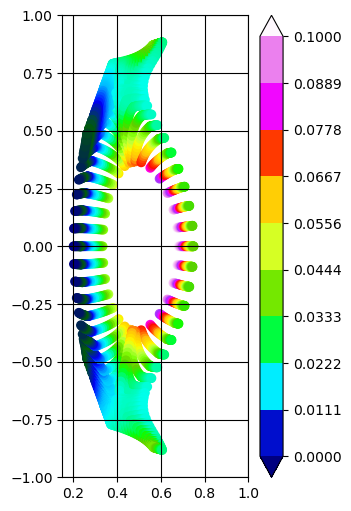

In [55]:
fig, ax = plt.subplots(figsize = (3,6))
import matplotlib as mpl

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

cmap = plt.get_cmap("gist_ncar")

plt.scatter(
    self.crx[:,:,0].flatten(),
    self.cry[:,:,0].flatten(), 
    c = self.fpsi[:,:,0] / (2*np.pi  self.crx[:,:,0]),
    cmap = cmap)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
ax.set_xlim(0.15, 1.0)
ax.set_ylim(-1,1)
ax.grid(c = "k", zorder = 0)

bounds = np.linspace(0,0.1,10)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),orientation='vertical')


In [19]:
psi_sep_omp = self.fpsi[(self.pol_omp, self.rad_sep, 0)] / (2*np.pi) # X of separatrix
psi_max_omp = self.fpsi[(self.pol_omp, 0, 0)] / (2*np.pi) # X of core edge ring
psi_min_omp = self.fpsi[(self.pol_omp, -1, 0)] / (2*np.pi) # X of SOL edge ring

psi_sep_imp = self.fpsi[(self.pol_imp, self.rad_sep, 0)] / (2*np.pi)
psi_min_imp = self.fpsi[(self.pol_imp, -1, 0)] / (2*np.pi)# Note radial is positive.
psi_max_imp = self.fpsi[(self.pol_imp, 0, 0)] / (2*np.pi)

psi_min_omp

0.032630385700343316

In [197]:
x_sep_omp = self.crx[(self.pol_omp, self.rad_sep, 0)] # X of separatrix
x_min_omp = self.crx[(self.pol_omp, 0, 0)] # X of core edge ring
x_max_omp = self.crx[(self.pol_omp, -1, 0)] # X of SOL edge ring

x_sep_imp = self.crx[(self.pol_imp, self.rad_sep, 0)] 
x_min_imp = self.crx[(self.pol_imp, -1, 0)] # Note radial is positive.
x_max_imp = self.crx[(self.pol_imp, 0, 0)]

self.yaml["psinorm_core"] = x_min_omp / x_sep_omp
self.yaml["psinorm_sol"] = x_max_omp / x_sep_omp
self.yaml["psinorm_sol_inner"] = 

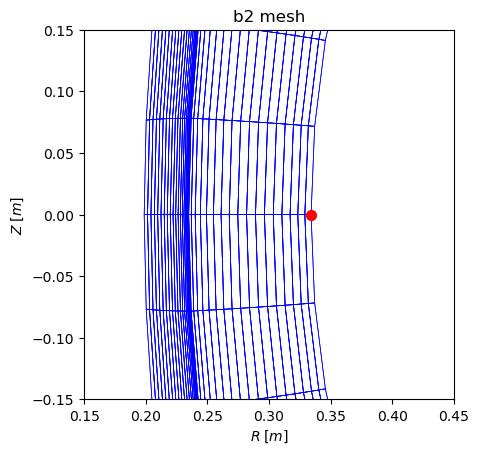

In [193]:
fig, ax = plt.subplots()
plot_mesh(ax, what = "b2", left = 0.15, right = 0.45, bottom = -0.15, top = 0.15)
plot_mesh(ax, what = "b2")
ax.scatter(self.crx[(self.pol_imp, 0, 0)], self.cry[(self.pol_imp, 0, 0)], marker = "o", s = 50, c = "r", zorder = 100)

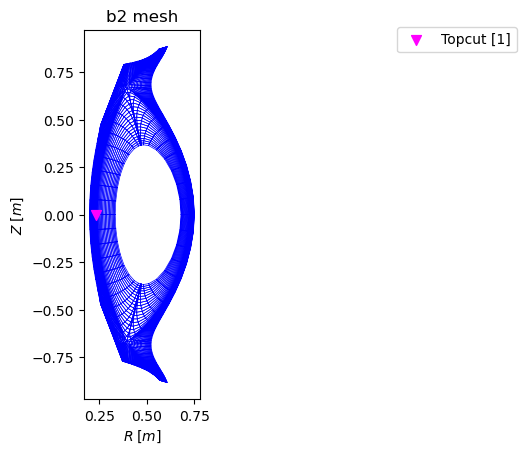

In [168]:
fig, ax = plt.subplots()
plot_mesh(ax, what = "b2")

data = 24#int((self.rightcut[1] - self.leftcut[1])/2)

ax.scatter(
    self.crx[data, 18, 0],
    self.cry[data, 18, 0],
    marker = "v", s = 50, zorder = 100, c = "magenta",label = "Topcut [1]")

fig.legend(loc = "upper left", bbox_to_anchor = (0.9,0.9))

In [ ]:
print(f"Leftcut: {self.leftcut}")
print(f"Rightcut: {self.rightcut}")
print(f"Topcut: {self.topcut}")
print(f"Bottomcut: {self.bottomcut}")

fig, ax = plt.subplots()
plot_mesh(ax, what = "b2")

# ax.scatter(
#     self.crx[int(self.leftcut[0]), 0, 0],
#     self.cry[int(self.leftcut[0]), 0, 0],
#     marker = "o", s = 50,  zorder = 100, c = "r", label = "Leftcut [0]")

# ax.scatter(
#     self.crx[int(self.leftcut[1]), 0, 0],
#     self.cry[int(self.leftcut[1]), 0, 0],
#     marker = "v", s = 50, zorder = 100, c = "r", label = "Leftcut [1]")

# ax.scatter(
#     self.crx[int(self.rightcut[0]), 0, 0],
#     self.cry[int(self.rightcut[0]), 0, 0],
#     marker = "o", s = 50,  zorder = 100, c = "k", label = "Rightcut [0]")

# ax.scatter(
#     self.crx[int(self.rightcut[1]), 0, 0],
#     self.cry[int(self.rightcut[1]), 0, 0],
#     marker = "v", s = 50, zorder = 100, c = "k",label = "Rightcut [1]")

# ax.scatter(
#     self.crx[self.pol_omp, int(self.topcut[0]), 0],
#     self.cry[self.pol_omp, int(self.topcut[0]), 0],
#     marker = "o", s = 50,  zorder = 100, c = "magenta", label = "Topcut [0]")

ax.scatter(
    self.crx[self.pol_omp, int(self.topcut[1]), 0],
    self.cry[self.pol_omp, int(self.topcut[1]), 0],
    marker = "v", s = 50, zorder = 100, c = "magenta",label = "Topcut [1]")

ax.scatter(
    self.crx[self.pol_omp, int(self.topcut[1]), 0],
    self.cry[self.pol_omp, int(self.topcut[1]), 0],
    marker = "v", s = 50, zorder = 100, c = "magenta",label = "Topcut [1]")

fig.legend(loc = "upper left", bbox_to_anchor = (0.9,0.9))

In [15]:
crx[int(self.bottomcut[0], self.leftcut[0], 0)]

TypeError: int() takes at most 2 arguments (3 given)

In [16]:
for cut in ["leftcut", "rightcut", "topcut", "bottomcut"]:
    for i in range(2):
        
        self.g[cut][i] = int(self.g[cut][i])

In [19]:
int(self.g["leftcut"][0])

12

In [36]:
def get_xy(coords):
    coords = np.array(coords).astype(int)
    return [crx[coords[0], coords[1], coords[2]], cry[coords[0], coords[1], coords[2]]]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

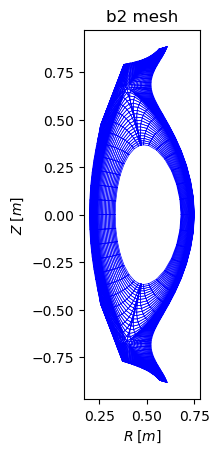

In [49]:
crx = self.crx
cry = self.cry

fig, ax = plt.subplots()
plot_mesh(ax, what = "b2")


In [51]:
print(f"Leftcut: {self.leftcut}")
print(f"Rightcut: {self.rightcut}")
print(f"Topcut: {self.topcut}")
print(f"Bottomcut: {self.bottomcut}")

Leftcut: [12. 36.]
Rightcut: [92. 68.]
Topcut: [18. 18.]
Bottomcut: [-1. -1.]


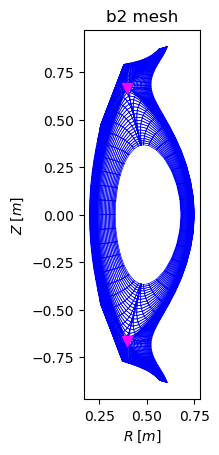

In [52]:

int(min(self.topcut[0], self.topcut[1])) 

i_in_lo_t = [0, self.rad_sep, 0]
i_in_lo_x = [self.leftcut[0], self.rad_sep, 0]
i_in_hi_x = [self.leftcut[1], self.rad_sep, 0]

coords = i_in_hi_x
ax.scatter(get_xy(coords)[0], get_xy(coords)[1], marker = "v", s = 50, zorder = 100, c = "magenta",label = "Topcut [1]")
fig